In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('ToyotaCorolla - MLR.csv')
df.head(10)

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
5,12950,32,61000,Diesel,90,0,2000,3,4,5,1170
6,16900,27,94612,Diesel,90,0,2000,3,4,5,1245
7,18600,30,75889,Diesel,90,0,2000,3,4,5,1245
8,21500,27,19700,Petrol,192,0,1800,3,4,5,1185
9,12950,23,71138,Diesel,69,0,1900,3,4,5,1105


In [3]:
# checking the data types 
df.dtypes 

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

In [59]:
#  “Describing the measures of central tendency and dispersion after cleaning the dataset.”
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Petrol
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.00000,1436.000000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,5.026462,1072.45961,0.880223
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.188510,52.64112,0.324814
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,3.000000,1000.00000,0.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,5.000000,1040.00000,1.000000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,5.000000,1070.00000,1.000000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,5.000000,1085.00000,1.000000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,6.000000,1615.00000,1.000000


In [5]:
df.drop( ["Cylinders"] , axis=1, inplace=True)

In [6]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Gears        0
Weight       0
dtype: int64

In [7]:
df =pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True, dtype= int )


In [8]:
df.drop("Fuel_Type_Diesel", axis=1, inplace=True)


In [9]:
df.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,5,1165,0
1,13750,23,72937,90,0,2000,3,5,1165,0
2,13950,24,41711,90,0,2000,3,5,1165,0
3,14950,26,48000,90,0,2000,3,5,1165,0
4,13750,30,38500,90,0,2000,3,5,1170,0


# Imputing the outliers 

In [10]:

#KM cannot be 1 and 15 hence removing the rows with less than 1000 KM 
# CC is way higher hence removed the row that contain 160000 as CC
data= df[(df['KM']> 1000) & (df['cc'] != 16000) ]


,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Petrol
186,6950,43,243000,69,0,1900,3,5,1110,0
187,9500,38,180638,90,0,2000,4,5,1160,0
188,11950,40,179860,90,0,2000,5,5,1205,0
189,7750,43,178858,110,0,1600,3,5,1084,0
190,11950,40,161000,69,0,1900,3,5,1105,0
191,4350,44,158320,69,0,1800,5,5,1110,0
378,6500,53,216000,69,0,1900,3,5,1110,0
379,6400,51,198167,69,0,1900,4,5,1095,0
380,7000,53,176000,69,0,1900,3,5,1105,0
381,7750,54,174139,72,0,2000,4,5,1100,0


“After imputing outliers and handling missing values, the following visualizations (histograms and boxplots) show the updated distribution of the dataset.”

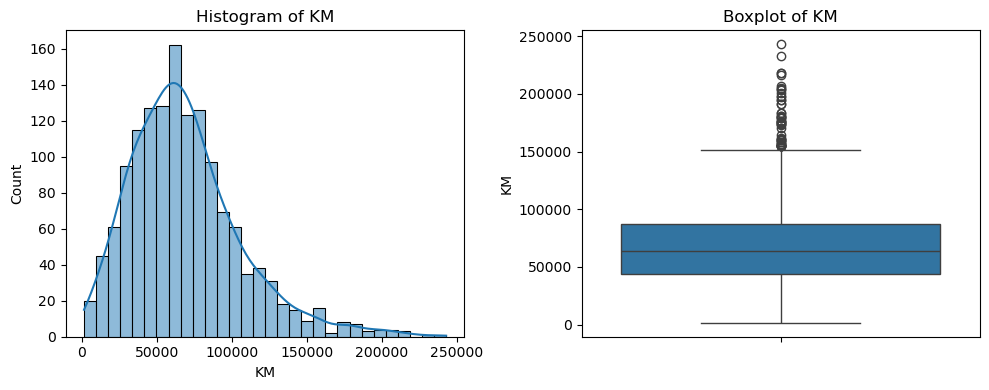

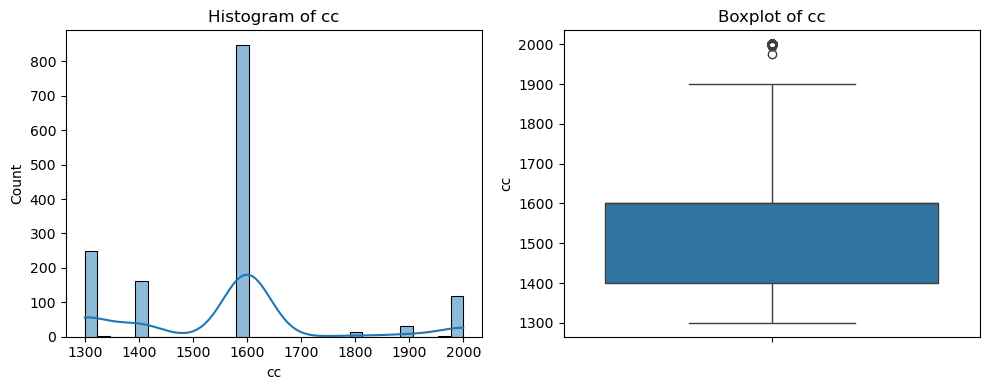

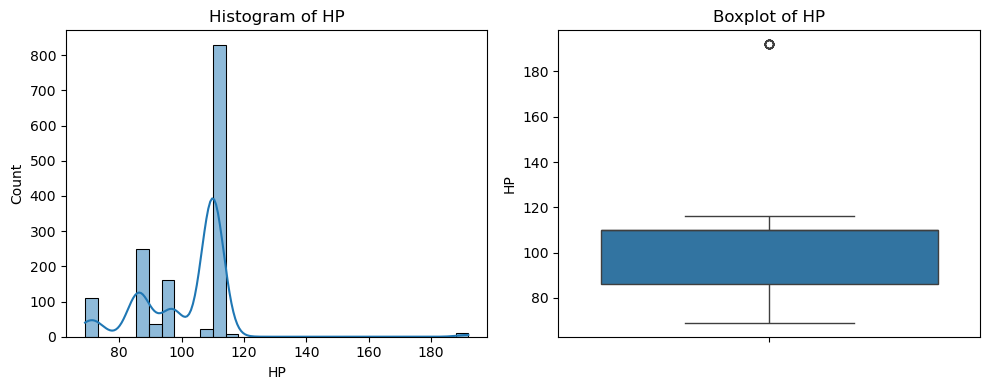

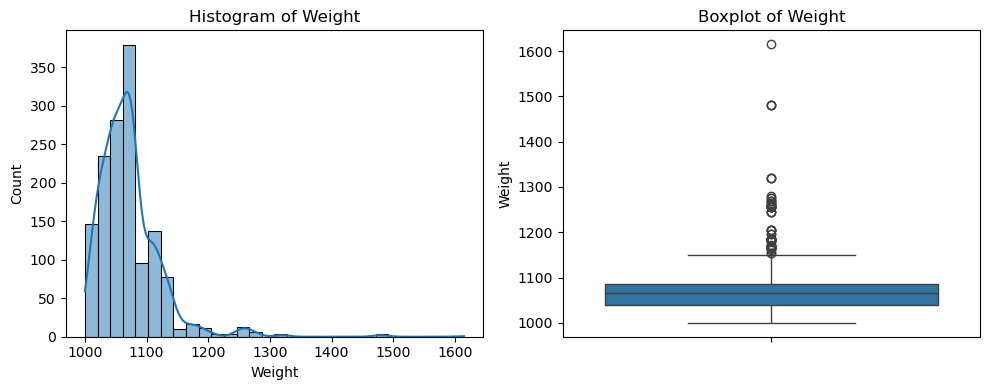

In [11]:
reg_col =["KM","cc","HP","Weight"]

for i in reg_col:
    plt.figure(figsize=(10,4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[i], kde=True, bins=30)
    plt.title(f'Histogram of {i}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(data[i])
    plt.title(f'Boxplot of {i}')

    plt.tight_layout()
    plt.show()

There are still some outliers but it will not much affect the model as they are also important and the outlier count is low 

In [12]:
data.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Petrol
count,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000
mean,10668.721208,56.283006,69096.238764,101.475421,0.055478,1566.548455,4.029494,5.026685,1071.803371,0.880618
std,3532.194563,18.195838,37153.538343,15.024439,0.228990,187.045601,0.953140,0.189288,51.357749,0.324351
min,4350.000000,4.000000,1500.000000,69.000000,0.000000,1300.000000,2.000000,3.000000,1000.000000,0.000000
25%,8450.000000,44.000000,43426.750000,86.000000,0.000000,1400.000000,3.000000,5.000000,1040.000000,1.000000
50%,9900.000000,61.000000,63831.000000,110.000000,0.000000,1600.000000,4.000000,5.000000,1065.000000,1.000000
75%,11900.000000,70.000000,87421.750000,110.000000,0.000000,1600.000000,5.000000,5.000000,1085.000000,1.000000
max,31275.000000,80.000000,243000.000000,192.000000,1.000000,2000.000000,5.000000,6.000000,1615.000000,1.000000


 # Checking the co-relation between varaibles

In [13]:
df.corr()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Petrol
Price,1.000000,-0.876590,-0.569960,0.314990,0.033081,0.126389,0.185326,0.063104,0.581198,-0.038516
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,0.031717,-0.098084,-0.148359,-0.005364,-0.470253,0.092611
KM,-0.569960,0.505672,1.000000,-0.333538,-0.081854,0.102683,-0.036197,0.015023,-0.028598,-0.433160
HP,0.314990,-0.156622,-0.333538,1.000000,0.013144,0.035856,0.092424,0.209477,0.089614,0.489110
Automatic,0.033081,0.031717,-0.081854,0.013144,1.000000,0.066740,-0.027654,-0.098555,0.057249,0.080249
cc,0.126389,-0.098084,0.102683,0.035856,0.066740,1.000000,0.079903,0.014629,0.335637,-0.315170
Doors,0.185326,-0.148359,-0.036197,0.092424,-0.027654,0.079903,1.000000,-0.160141,0.302618,-0.027589
Gears,0.063104,-0.005364,0.015023,0.209477,-0.098555,0.014629,-0.160141,1.000000,0.020613,0.063182
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057249,0.335637,0.302618,0.020613,1.000000,-0.560470
Fuel_Type_Petrol,-0.038516,0.092611,-0.433160,0.489110,0.080249,-0.315170,-0.027589,0.063182,-0.560470,1.000000


<Axes: >

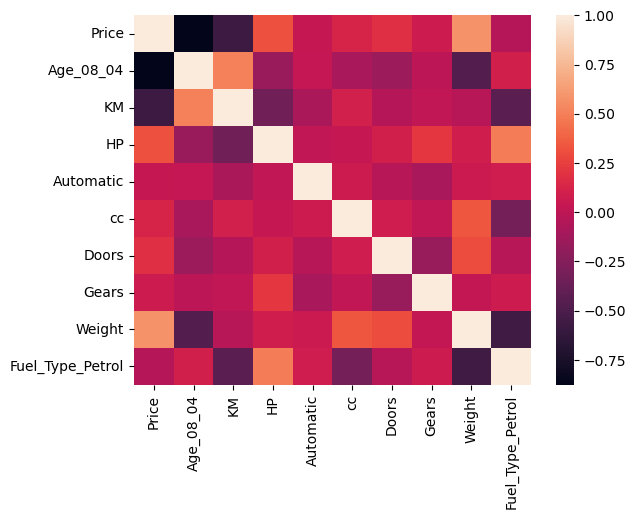

In [14]:
# visualizing the co-relations using Heatmap
sns.heatmap(df.corr())

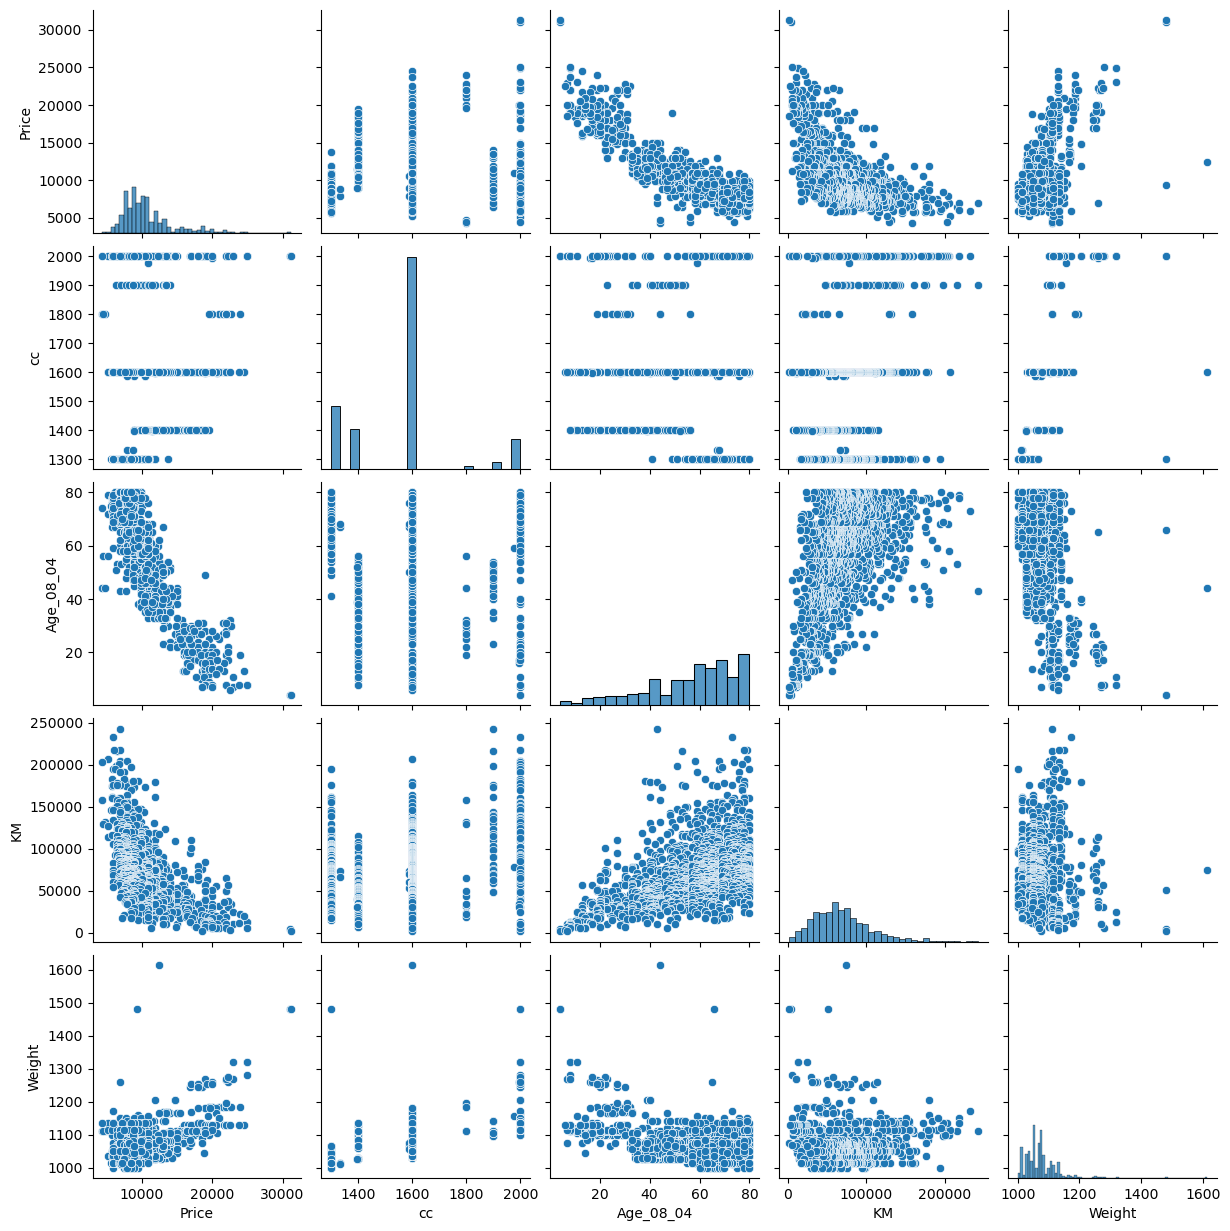

In [27]:
sns.pairplot(data[["Price","cc","Age_08_04","KM","Weight"]])

# Model creation  

In [16]:
X = data.drop('Price', axis=1) # Feature variable
y=data["Price"] # Target varaible

In [17]:
# importing useful data modules 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [18]:
# assigning the train and text data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [60]:
# Normalizing and standardizing the data 
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train) # fit_transfor is used for training ddata
X_test =scaler.transform(X_test) # tranform to traing data 


In [53]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [54]:
y_pred = model.predict(X_test)


In [55]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R2_sqaure:", r2)
print("MSE:", mse)
print("RMSE:", rmse)

R2_sqaure: 0.8557429785487521
MSE: 1683631.3046978011
RMSE: 1297.5481897400964


# Using ridge and lasso to regularize the model 

In [56]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=0.05)
ridge.fit(X_train, y_train)
print("Ridge R²:", r2_score(y_test, ridge.predict(X_test)))

# Lasso
lasso = Lasso(alpha=0.05)
lasso.fit(X_train, y_train)
print("Lasso R²:", r2_score(y_test, lasso.predict(X_test)))

Ridge R²: 0.8557453998789039
Lasso R²: 0.8557494450181421


# Visulizing the predicted and actual value 

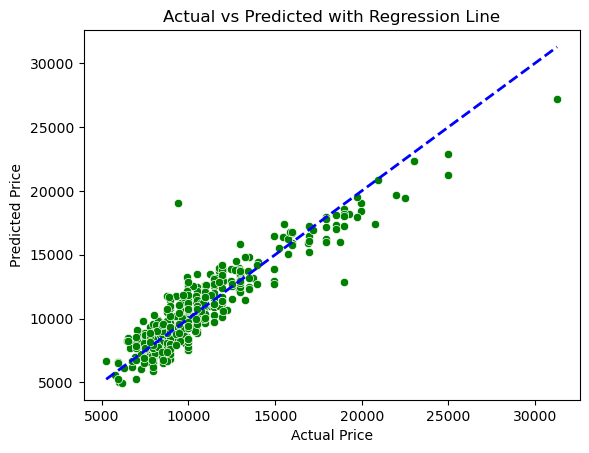

In [33]:
sns.scatterplot(x=y_test, y=y_pred, color="green")

# Add regression line (y=x)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="blue", linewidth=2, linestyle='--')

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted with Regression Line")
plt.show()

# Predicting with new data 

In [42]:
new_data = [[26	,48000,	90,	0,	2000,	3,	5,	1165,	0]]

In [51]:

print("Using MLR for new data : ", model.predict(scaler.transform(new_data)))
print("Using rigde for new data : ", ridge.predict(scaler.transform(new_data)))
print("Using lasso for new data : ", lasso.predict(scaler.transform(new_data)))


Using MLR for new data :  [15816.49038891]
Using rigde for new data :  [15816.38725642]
Using lasso for new data :  [15816.22680331]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Conclusion   

“From the above modeling, we can see that the predicted values and accuracy are nearly the same for Linear Regression, Lasso, and Ridge.”